In [23]:
from pandas import Series, DataFrame
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

# Set random seed
np.random.seed(123)

Populating the interactive namespace from numpy and matplotlib


C:\Users\india\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
df = pd.read_csv('spotify_2000.csv')

__What is the relationship between a song's title and it's features?__

Are songs containing an exclamation point in the title actually more enthusiastic? 

In [3]:
import re #regular expressions to detect specific pattern within a string

def exclamation(s): #function to detect ! within string
    s = str(s)
    return (len(re.findall('!', s)) > 0)

exclaim_mask = df['track'].map(exclamation) #mask applying function to song titles
exclaim_df = df[exclaim_mask] #dataframe with songs containing ! 
exclaim_no = df[~(df.index.isin(exclaim_df.index))] #dataframe with songs not containing !

In [4]:
features = ['energy','valence','danceability'] #list of features to analyze
data = pd.DataFrame(index =['All songs','Songs without !','Songs with !'])#creating empty dataframe 

In [5]:
for metric in features: 
    #creating list of median values for metric for all songs, songs with !, and  songs without ! 
    values = [df[metric].median(),exclaim_no[metric].median(),exclaim_df[metric].median()]
    data[metric] = values #using metric as column name 

data.head()

,energy,valence,danceability
All songs,0.744,0.486,0.556
Songs without !,0.743,0.484,0.555
Songs with !,0.810,0.632,0.674


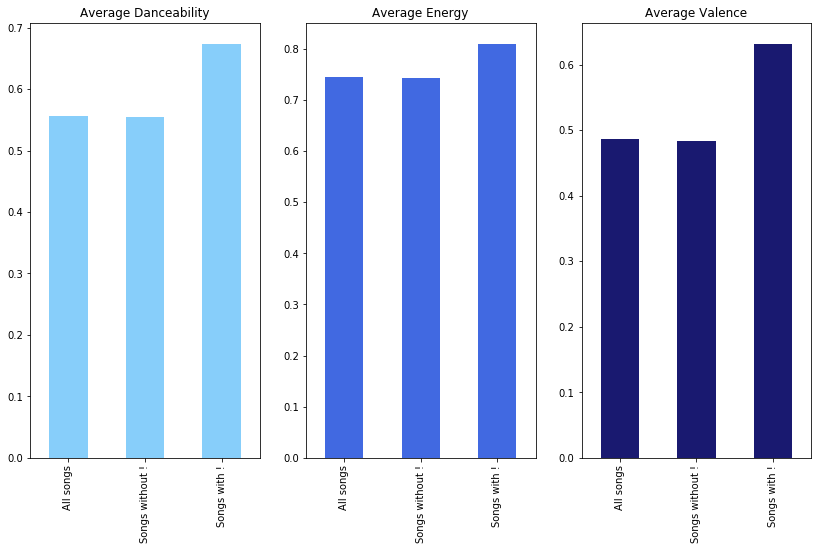

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(14,8))

data['danceability'].plot(kind='bar',color='lightskyblue', ax=axes[0], title = 'Average Danceability')
data['energy'].plot(kind='bar',color='royalblue', ax=axes[1], title = 'Average Energy')
data['valence'].plot(kind='bar',color='midnightblue', ax=axes[2], title = 'Average Valence')

Songs with ! in the title tend to be easier to dance to, have greater energy, and have a happier feel.   

__How many hits vs flops does this data set contain?__

In [21]:
prop_hit = sum(df['target'] == 1)/len(df)
prop_flop = sum(df['target'] == 0)/len(df)
print(prop_hit*100,"% of the songs are hits while",prop_flop*100,"% are flops")

50.0 % of the songs are hits while 50.0 % are flops


The data set is evenly split between hits and flops. 

__How are variables related?__

One would expect more danceable songs to also have higher energy, liveness, tempo, valence, loudness... is this true?

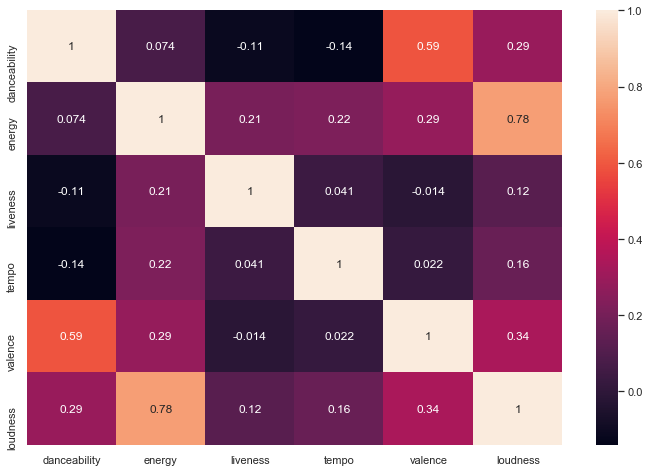

In [25]:
corr = df[['danceability','energy','liveness','tempo','valence','loudness']].corr(method='pearson')
sns.set(style='whitegrid')
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)

You can observe that there's a strong positive correlation between a track's energy and loudness and between a track's valence and danceability. A mild positive relationship exists between a track's loudness and danceability and loudness and valence. 

Typically, we can expect songs with greater energy to be quite loud and good for dancing. Songs that are more danceable also tend to convey a positive emotion. 

__Which artists are releasing the greatest number of hits? How about flops?__

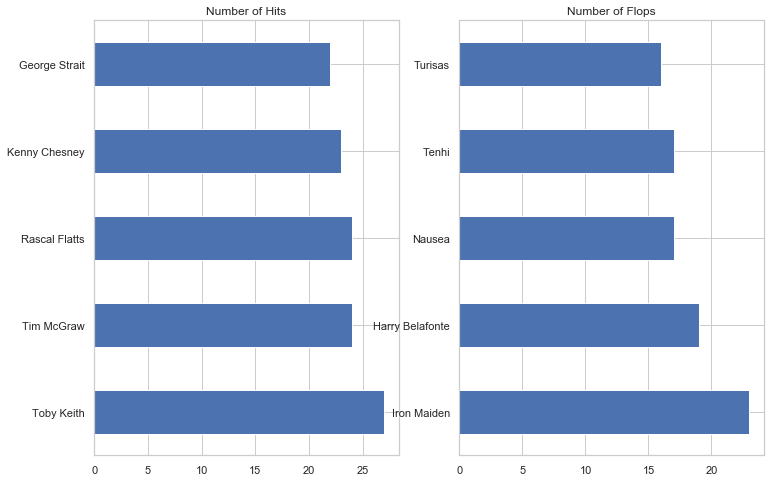

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(12,8))

hits = df[df["target"]==1] #subsetting songs that are hits 
hits_vc = hits["artist"].value_counts().sort_values(ascending=False)[:5].plot(kind="barh",ax=axes[0],title="Number of Hits") #number of hits each artist has produced

flops = df[df["target"]==0] #subsetting songs that are flops
flops_vc = flops["artist"].value_counts().sort_values(ascending=False)[:5].plot(kind="barh",ax=axes[1], title="Number of Flops") #number of flops each artist has produced

Our dataset definitely has a preference towards country music with Toby Keith taking the lead in the number of hits produced. If you have a preference for more alternative music and extreme metal is more your taste, I definitely recommend checking out Iron Maiden or Nausea.